# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)


#### Импорт библиотек

In [2]:
#Данные
import pandas as pd
import numpy as np

#Визуализация
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

#Модели
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score

#### Импорт данных

In [3]:
geo = pd.read_excel('geo.xlsx')
geo.head()

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1
3,37.558526,55.728758,-1
4,37.566431,55.731794,-1


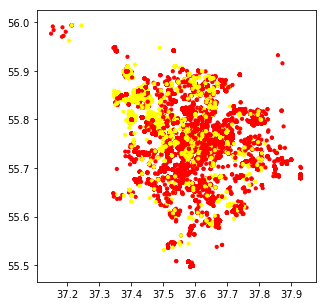

In [4]:
plt.figure(figsize=(5,5))
plt.scatter(geo['x'], geo['y'], c=geo['comment_class'], cmap='autumn', s=10)

#### Preprocessing

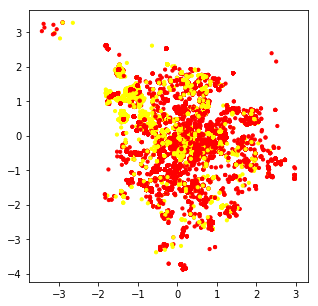

In [5]:
# Нормализация данных
scaler = StandardScaler()
geo_scaled = scaler.fit_transform(geo[['x', 'y']])
geo_scaled = pd.DataFrame({'x':geo_scaled[:,0],'y':geo_scaled[:,1], 'comment_class':geo['comment_class']})

#Отображение нормализованных данных на графике
plt.figure(figsize=(5,5))
plt.scatter(geo_scaled['x'], geo_scaled['y'], c=geo_scaled['comment_class'], cmap='autumn', s=10)

### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

#### Изучение районов безотносительно голосов

In [6]:
# Кластеризация с помощью метода KMeans
#method = DBSCAN(eps=0.08, metric='cityblock', min_samples=20)
method = KMeans(n_clusters=6)
clusters = method.fit_predict(geo_scaled[['x','y']],)

df = pd.DataFrame({'x':geo_scaled['x'],'y':geo_scaled['y'], 'cluster':clusters})
#df_norm = df[(df.cluster!=-1)]

Text(0.5,1,'KMeans, Number Of Clusters = 6')

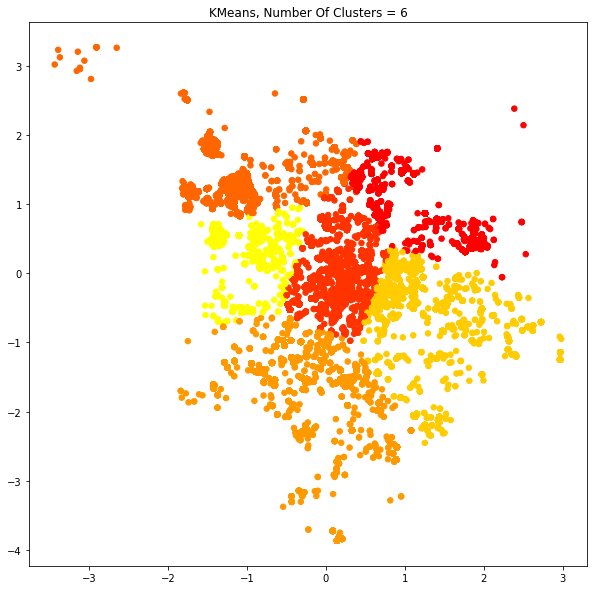

In [7]:
# Результаты класстеризации (без выбросов)
plt.figure(figsize=(10,10))
plt.scatter(df.x, df.y, c=df.cluster, cmap='autumn', s=30)
plt.title('KMeans, Number Of Clusters = {0}'.format(len(df.cluster.unique())))

#### Изучение районов с учетом голосов

In [8]:
# положительные оценки
geo_scaled_positive = geo_scaled[(geo_scaled.comment_class==1)]

method = KMeans(n_clusters=6)
clusters = method.fit_predict(geo_scaled_positive[['x', 'y']])

df = pd.DataFrame({'x':geo_scaled_positive['x'], 'y':geo_scaled_positive['y'], 'cluster':clusters})
#df = df[(df.cluster!=-1)]

Text(0.5,1,'KMeans, Number Of Clusters = 6')

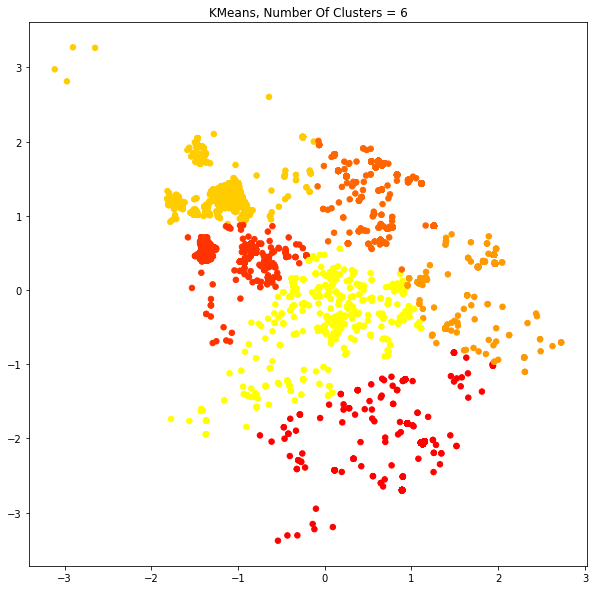

In [9]:
# Результаты класстеризации положительных оценок (без выбросов)
plt.figure(figsize=(10,10))
plt.scatter(df.x, df.y, c=df.cluster, cmap='autumn', s=30)
plt.title('KMeans, Number Of Clusters = {0}'.format(len(df.cluster.unique())))

In [10]:
# отрицательные оценки
geo_scaled_negative = geo_scaled[(geo_scaled.comment_class==-1)]

method = KMeans(n_clusters=6)
clusters = method.fit_predict(geo_scaled_negative[['x', 'y']])

df = pd.DataFrame({'x':geo_scaled_negative['x'], 'y':geo_scaled_negative['y'], 'cluster':clusters})
#df_norm = df[(df.cluster!=-1)]

Text(0.5,1,'KMeans, Number Of Clusters = 6')

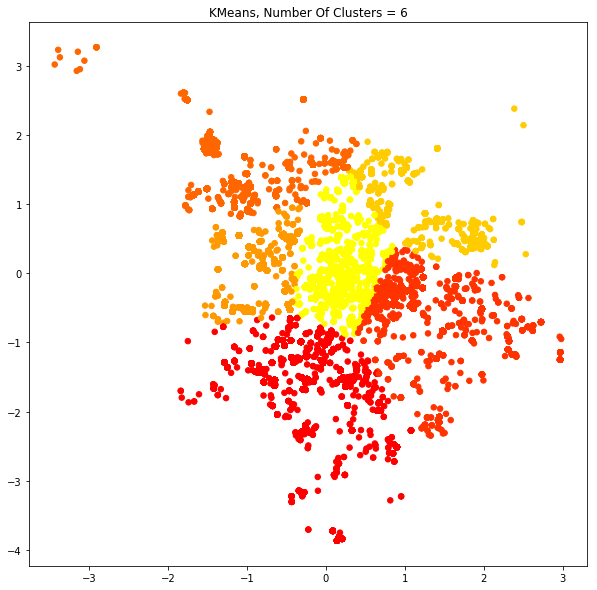

In [11]:
# Результаты класстеризации отрицательных оценок (без выбросов)
plt.figure(figsize=(10,10))
plt.scatter(df.x, df.y, c=df.cluster, cmap='autumn', s=30)
plt.title('KMeans, Number Of Clusters = {0}'.format(len(df.cluster.unique())))

#### Подбор количества класстеров

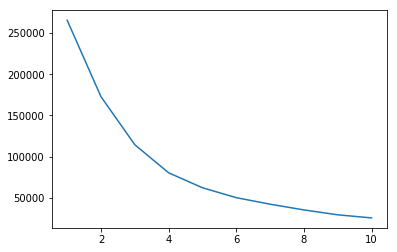

In [12]:
# Для всех оценок
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(geo_scaled, )
    k_inertia.append(clf_kmeans.inertia_)
    
plt.plot(ks, k_inertia)

In [13]:
diff = np.diff(k_inertia)

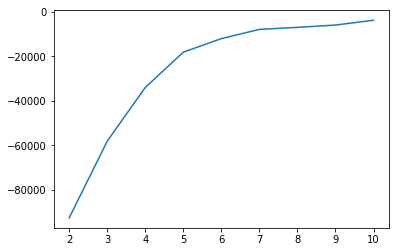

In [14]:
plt.plot(ks[1:], diff)

In [15]:
diff_r = diff[1:] / diff[:-1]

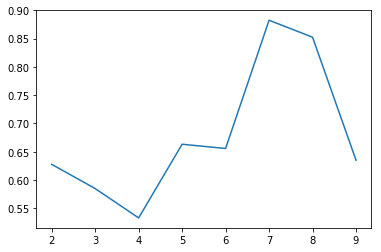

In [16]:
plt.plot(ks[1:-1], diff_r)

In [17]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

4

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [67]:
# Применение алгоритма DBSCAN для класстеризации

method = DBSCAN(eps=0.08, metric='cityblock', min_samples=200)
clusters = method.fit_predict(geo_scaled[['x','y']],)

df = pd.DataFrame({'x':geo_scaled['x'],'y':geo_scaled['y'], 'cluster':clusters})
#df = df[(df.cluster!=-1)]

In [64]:
most_voting_region = df.groupby('cluster').count().sort_values('x', ascending=False).head(20).index.values

In [69]:
df['new_cluster'] = df.apply(lambda row: -1 if row.cluster not in most_voting_region else row.cluster, axis=1 )

Text(0.5,1,'DBSCAN, Number Of Clusters = 20')

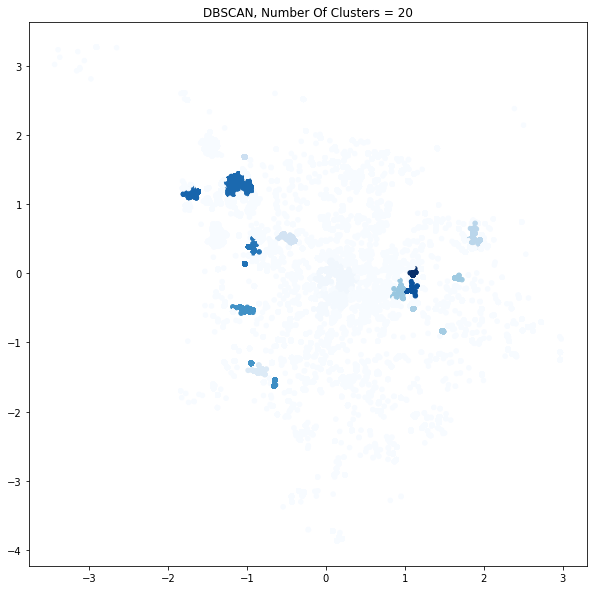

In [70]:
# Результаты класстеризации (без выбросов)
plt.figure(figsize=(10,10))
plt.scatter(df.x, df.y, c=df.new_cluster, cmap='Blues', s=20)
plt.title('DBSCAN, Number Of Clusters = {0}'.format(len(df.new_cluster.unique())))